Risultati del fit preliminare:
A = 0.9838 ± 0.0319
B = -0.0000 ± 0.0000
C = -0.3809 ± 0.1769
D = 0.0000 ± 0.0000
fr = 3176614559.5203 ± 86900.1731
QL = 12463.9398 ± 8104.2799
Risultati del fit:
L = -12787.5674 ± 133.7247
C = 31546.9414 ± 801.8773
fr = 3176599988.1676 ± 173.9899
phi = 2.9719 ± 0.0019
a0 = -0.0000 ± 0.0000
a1 = 0.0000 ± 0.0000


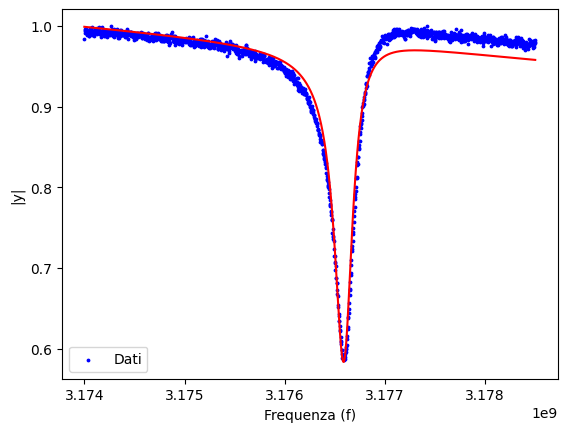

In [1]:
import sys 
sys.path.append("../analysis")
import circular_resonator 
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    '''
    funzione per leggere i dati
    '''
    data = np.loadtxt(file_path, delimiter=',')  
    f = data[:, 0]     # frequenza
    x = data[:, 1]     # parte reale (I)
    y = data[:, 2]     # parte immaginaria (Q)
    return f, x, y

def main () :
    file_path = "../data/Q_res20.txt"

    f, x, y = read_data (file_path)

    power = np.sqrt(np.abs(x)**2 + np.abs(y)**2)
    ymax = np.max(power)
    power = power/ymax

    parameters, errors = circular_resonator.fit_resonance (f, power)

    # Stampa dei risultati
    print("Risultati del fit:")
    parametri = ["L", "C", "fr", "phi", "a0", "a1"]
    for parametro in parametri:
        print(f"{parametro} = {parameters[parametro]:.4f} ± {errors[parametro]:.4f}")


    # Plot dei dati e del fit
    plt.scatter(f, power, label='Dati', color='blue', s = 3)

    plt.plot(f, circular_resonator.full_fit(f, a0=parameters["a0"], a1=parameters["a1"], L=parameters["L"], C=parameters["C"], fr=parameters["fr"], phi=parameters["phi"], fmin=parameters["fmin"] ), color = "red")

    plt.xlabel('Frequenza (f)')
    plt.ylabel('|y|')
    plt.legend()
    plt.show()

if __name__ == '__main__' :
    main ()



